In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

## MNIST

In [2]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
y[0]

'5'

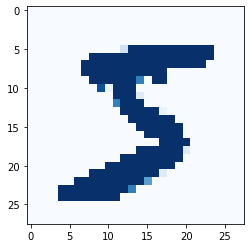

In [6]:
plt.imshow(X[0,:].reshape(28,28), cmap='Blues', clim=(0,16))

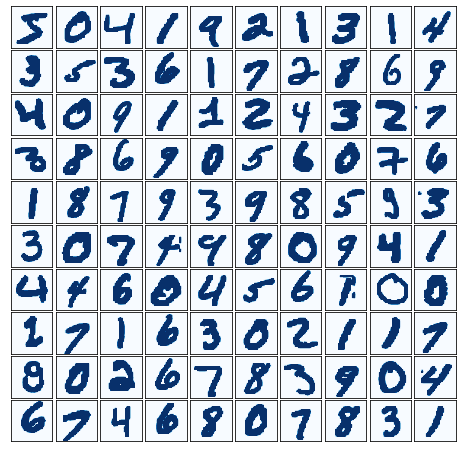

In [7]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(X[i].reshape(28, 28), cmap='Blues')
    im.set_clim(0, 16)


In [8]:
X.shape

(70000, 784)

In [9]:
keep = pd.Series(y).isin(['0','1','3','7','9'])

In [10]:
X_subset = X[keep].copy()

In [11]:
y_subset = y[keep].copy()

In [12]:
X_subset.shape

(36172, 784)

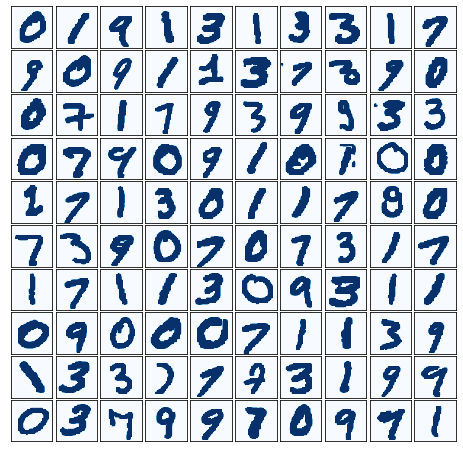

In [13]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(X_subset[i].reshape(28, 28), cmap='Blues')
    im.set_clim(0, 16)

In [14]:
pca = PCA(n_components=.8)

In [15]:
X_pca = pca.fit(X_subset)

In [ ]:
#X_pca.explained_variance_ratio_.cumsum()

In [16]:
pca.n_components_

35

In [17]:
X_transform = X_pca.transform(X_subset)

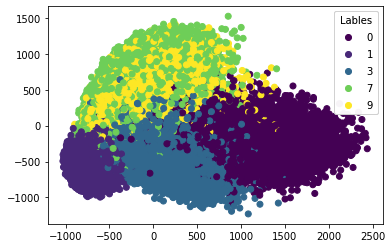

In [18]:
pc1 = X_transform[:,0]
pc2 = X_transform[:,1]
labels = y_subset.astype(int)
fig, ax = plt.subplots()
scatter = ax.scatter(pc1, pc2, c=labels)

legend = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Lables")
ax.add_artist(legend)


In [19]:
digits_new = pca.inverse_transform(X_transform)

In [20]:
digits_new.shape

(36172, 784)

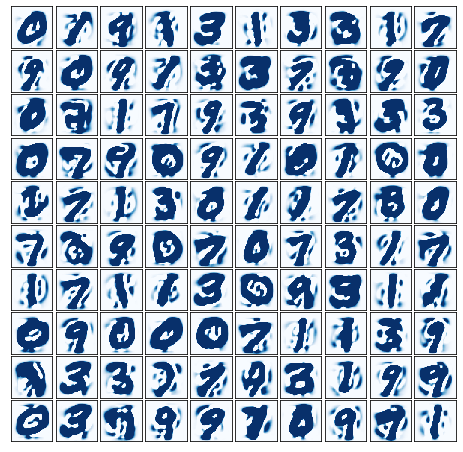

In [21]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits_new[i].reshape(28, 28), cmap='Blues')
    im.set_clim(0, 16)

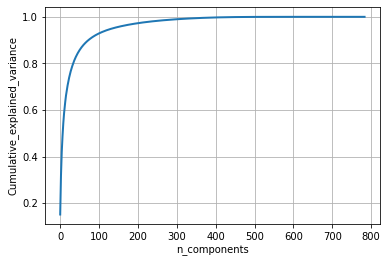

In [22]:
pca.n_components = 784
pca_data = pca.fit_transform(X_subset)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()